 ![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

# **Reclutamiento de Empleados con Aprendizaje Automático | Colocación Laboral con Python | Sistema de Adquisición de Talento en RR.HH.**

En el mundo acelerado de hoy, las empresas buscan constantemente formas innovadoras para optimizar sus procesos, y la gestión de recursos humanos (RR.HH.) no es una excepción. Los métodos de reclutamiento tradicionales suelen ser consumidores de tiempo y carecen de la eficiencia necesaria para identificar a los mejores candidatos para el trabajo. Sin embargo, con los avances en aprendizaje automático y análisis de datos, los profesionales de RR.HH. ahora tienen herramientas poderosas a su disposición para revolucionar el proceso de reclutamiento.




## **Entendimiento del Proyecto:**
El proyecto está diseñado para aprovechar las técnicas de ML para predecir colocaciones laborales basadas en varios factores, como el rendimiento académico, la experiencia laboral, la especialización, y más.

Al analizar los datos históricos de empleados anteriores, el sistema busca identificar patrones y correlaciones que puedan predecir si un candidato es probable que sea colocado o no.

In [112]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [113]:
df = pd.read_csv("https://raw.githubusercontent.com/germaingarcia/Files_Lectures/main/Placement_Data_Full_Class.csv")

In [114]:
# mostramos la estructura del dataframe : head
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## **Diccionario**

1. **Sl_no**: Número de serie o identificador único para cada entrada o persona.
2. **gender**: Género del individuo.
3. **ssc_p**: Porcentaje obtenido en los exámenes de secundaria (SSC suele referirse a Secondary School Certificate).
4. **ssc_b**: Junta o comité organizador de los exámenes de secundaria.
5. **hsc_p**: Porcentaje obtenido en los exámenes de educación superior secundaria (HSC se refiere a Higher Secondary Certificate).
6. **hsc_b**: Junta o comité organizador de los exámenes de educación superior secundaria.
7. **hsc_s**: Especialización o área de estudio en la educación superior secundaria (ciencias, comercio, arte, etc.).
8. **degree_p**: Porcentaje obtenido en el grado universitario.
9. **degree_t**: Tipo de grado o campo de estudio en la educación universitaria (por ejemplo, tecnología, artes, comercio).
10. **workex**: Experiencia laboral (generalmente indicado como 'Yes' o 'No').
11. **etest_p**: Porcentaje obtenido en un examen de prueba, posiblemente un examen de empleabilidad o habilidades específicas.
12. **specialisation**: Especialización en estudios de posgrado, especialmente en programas de MBA.
13. **mba_p**: Porcentaje obtenido en el programa de MBA.
14. **status**: Estado del empleo o resultado del proceso de selección (como 'employed' o 'unemployed').
15. **salary**: Salario ofrecido o actual del individuo.



In [37]:
#Analizamos que variables no ayudan y lo eliminamos: ssc_b','hsc_b','hsc_s','degree_t','salary
#Código aquí
df.describe()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [38]:
df.shape

(215, 15)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [40]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [41]:
df.duplicated().sum()

0

In [115]:
df.drop(['ssc_b','hsc_b','hsc_s','degree_t','salary'], axis=1, inplace=True)

In [43]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,91.00,58.00,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,78.33,77.48,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,68.00,64.00,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,52.00,52.00,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,73.60,73.30,No,96.8,Mkt&Fin,55.50,Placed


## Preprocessing

## Encoding

 Limpiar y preparar el conjunto de datos para el análisis. Esto incluye manejar valores faltantes, codificar variables categóricas y escalar características numéricas.

In [116]:
# codifica genero, experiencia de trabajo, estatus y especialización
# Puedes usar esta celda como punto de partida

# Consultar valores distintos de 'gender'
print("Valores distintos de 'gender':", df['gender'].unique())

# Consultar valores distintos de 'workex'
print("Valores distintos de 'workex':", df['workex'].unique())

# Consultar valores distintos de 'status'
print("Valores distintos de 'status':", df['status'].unique())

# Consultar valores distintos de 'specialisation'
print("Valores distintos de 'specialisation':", df['specialisation'].unique())

Valores distintos de 'gender': ['M' 'F']
Valores distintos de 'workex': ['No' 'Yes']
Valores distintos de 'status': ['Placed' 'Not Placed']
Valores distintos de 'specialisation': ['Mkt&HR' 'Mkt&Fin']


In [117]:
diccionario_gender = {
    'M': 0,
    'F': 1
}
df['gender']=df['gender'].map(diccionario_gender)

In [118]:
diccionario_workex = {
    'No': 0,
    'Yes': 1
}
df['workex']=df['workex'].map(diccionario_workex)

In [119]:
diccionario_status = {
    'Not Placed': 0,
    'Placed': 1
}
df['status']=df['status'].map(diccionario_status)

In [120]:
#'specialisation': ['Mkt&HR' 'Mkt&Fin']t
diccionario_spec = {
    'Mkt&HR': 0,
    'Mkt&Fin': 1
}
df['specialisation']=df['specialisation'].map(diccionario_spec)

In [20]:

#scaler = StandardScaler()

#df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']] = scaler.fit_transform(df[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']])


In [103]:
df.head()

,sl_no,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,1,0,67.00,91.00,58.00,0,55.0,Mkt&HR,58.80,1
1,2,0,79.33,78.33,77.48,1,86.5,Mkt&Fin,66.28,1
2,3,0,65.00,68.00,64.00,0,75.0,Mkt&Fin,57.80,1
3,4,0,56.00,52.00,52.00,0,66.0,Mkt&HR,59.43,0
4,5,0,85.80,73.60,73.30,0,96.8,Mkt&Fin,55.50,1


# Balance Dataset


In [121]:
df['status'].value_counts()

status
1    148
0     67
Name: count, dtype: int64

In [122]:
from sklearn.utils import resample


# Separar la clase minoritaria de la clase mayoritaria
df_majority = df[df.status==1]
df_minority = df[df.status==0]

# Adicionar elementos de la clase minoritaria
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results

# Combinar clases mayoritarias y clases minoritarias en la variable balanced_data
balanced_data = pd.concat([df_majority, df_minority_upsampled])

# Verificar el balance de las clases
print(balanced_data['status'].value_counts())


status
1    148
0    148
Name: count, dtype: int64


In [123]:
balanced_data['status'].value_counts()

status
1    148
0    148
Name: count, dtype: int64



```
# This is formatted as code
```

# Train Test Split

In [124]:
# Separación de feature y target
#X = balanced_data.copy().drop('status', axis=1)
#y = balanced_data['status']

from sklearn.model_selection import train_test_split

# Separación de feature y target
X = balanced_data.drop('status', axis=1)
y = balanced_data['status']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las formas de los conjuntos de datos
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (236, 9)
Shape of X_test: (60, 9)
Shape of y_train: (236,)
Shape of y_test: (60,)


In [125]:
#Train Test Split con test_size=0.3
from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test =
# Puedes usar esta celda como punto de partida

# División del conjunto de datos en conjuntos de entrenamiento y prueba (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las formas de los conjuntos de datos
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)



Shape of X_train: (207, 9)
Shape of X_test: (89, 9)
Shape of y_train: (207,)
Shape of y_test: (89,)


# Feature Scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler

# Escalar características de X_train y X_test
#scaler = MinMaxScaler()
ms = MinMaxScaler()

X_train_scaled = ms.fit_transform(X_train)
X_test_scaled = ms.transform(X_test)

# Verificar las formas de los conjuntos de datos escalados
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)



Shape of X_train_scaled: (207, 9)
Shape of X_test_scaled: (89, 9)


# 1 k-nearest neighbor

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el clasificador
knn.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8314606741573034


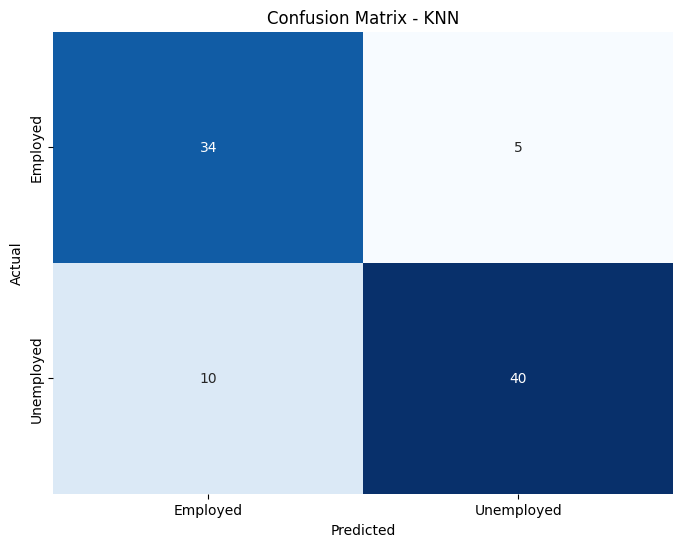

In [128]:
# Matriz de confusión heatmap KNN
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Employed', 'Unemployed'],
            yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()



# Decision Tree

In [129]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier


# Crear clasificador de árbol de decisiones
decision_tree = DecisionTreeClassifier(random_state=42)

# Entrenar el clasificador
decision_tree.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_dt = decision_tree.predict(X_test_scaled)

# Calcular la precisión
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree):", accuracy_dt)



Accuracy (Decision Tree): 0.898876404494382


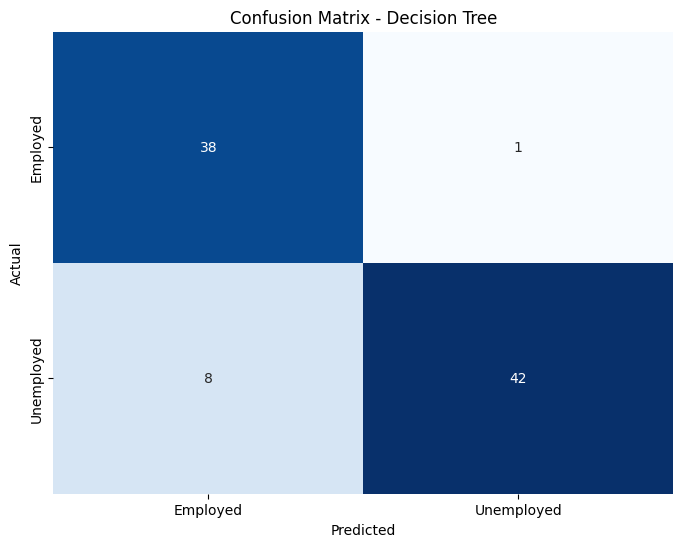

In [130]:
# creating confusion matrix heatmap (Decision Tree)

# Calcular la matriz de confusión
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Crear el mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Employed', 'Unemployed'],
            yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


# SVM

In [131]:
# Support Vector Machine
from sklearn.svm import SVC

# Crear clasificador SVM
svm_classifier = SVC(kernel='linear', random_state=42)

# Entrenar el clasificador
svm_classifier.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calcular la precisión
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy_svm)



Accuracy: 0.7865168539325843


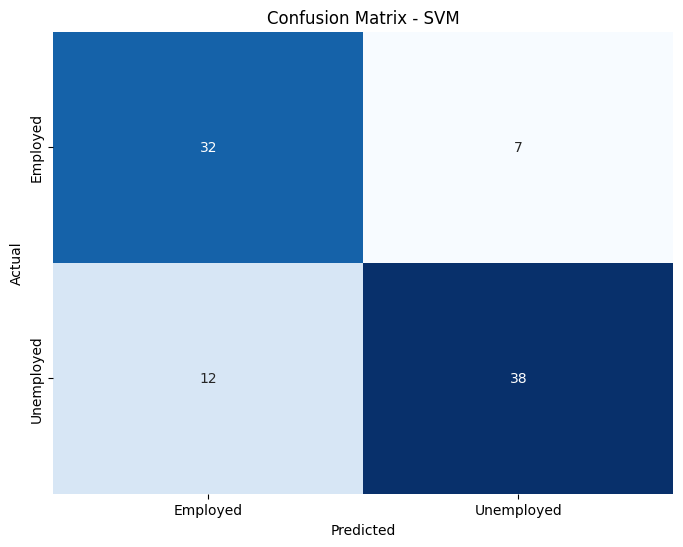

In [132]:
# creating confusion matrix heatmap SVM
# Calcular la matriz de confusión
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Crear el mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Employed', 'Unemployed'],
            yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()




# Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier


# Crear clasificador Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el clasificador
random_forest.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = random_forest.predict(X_test_scaled)

# Calcular la precisión
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)



Accuracy: 0.9101123595505618


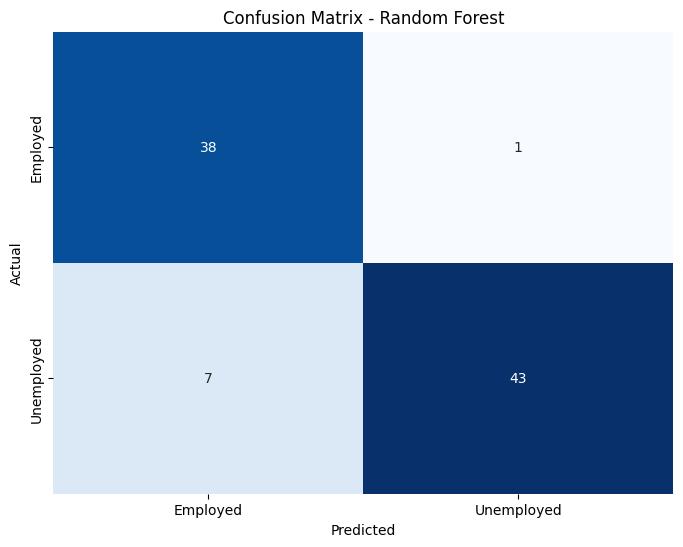

In [134]:
# creating confusion matrix heatmap - Random Forest

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Crear el mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Employed', 'Unemployed'],
            yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()





# Gaussian Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

# Crear clasificador Naive Bayes
nb_classifier = GaussianNB()

# Entrenar el clasificador
nb_classifier.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_nb = nb_classifier.predict(X_test_scaled)

# Calcular la precisión
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy:", accuracy_nb)



Accuracy: 0.7865168539325843


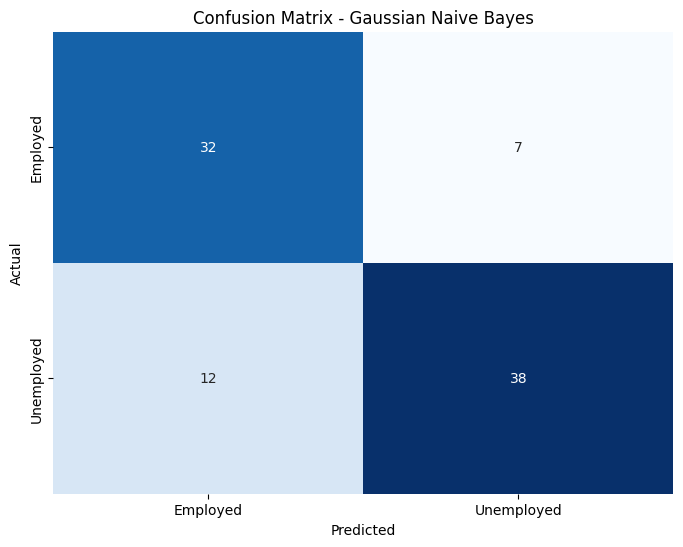

In [136]:
# Calcular la matriz de confusión
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Crear el mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Employed', 'Unemployed'],
            yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()


# Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression

# Crear clasificador de Regresión Logística
logistic_regression = LogisticRegression(random_state=42)

# Entrenar el clasificador
logistic_regression.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_logistic = logistic_regression.predict(X_test_scaled)

# Calcular la precisión
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy_logistic)




Accuracy: 0.8089887640449438


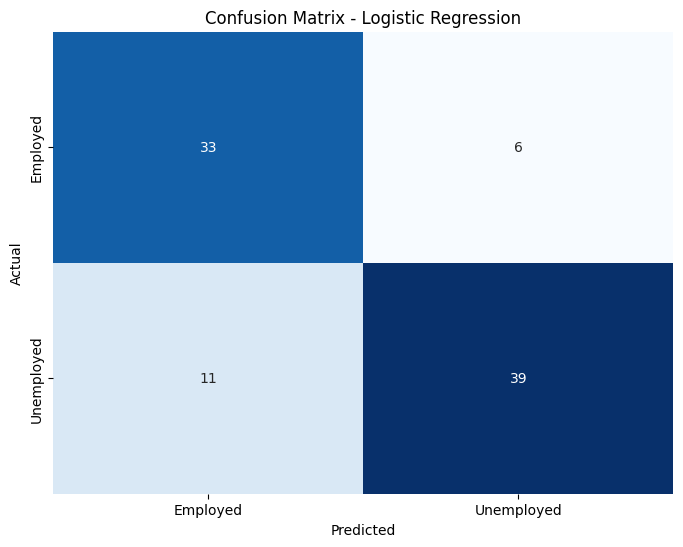

In [138]:
# Calcular la matriz de confusión
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Crear el mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=['Employed', 'Unemployed'],
            yticklabels=['Employed', 'Unemployed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


## Single Input Predictions

Test si está prediciendo adecuadamente

In [139]:
from sklearn.metrics import classification_report

# Calcular otras métricas
print("Classification Report - KNN:")
print(classification_report(y_test, y_pred))

print("Classification Report - Decision Tree:")
print(classification_report(y_test, y_pred_dt))

print("Classification Report - SVM:")
print(classification_report(y_test, y_pred_svm))

print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("Classification Report - Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logistic))


Classification Report - KNN:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        39
           1       0.89      0.80      0.84        50

    accuracy                           0.83        89
   macro avg       0.83      0.84      0.83        89
weighted avg       0.84      0.83      0.83        89

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89        39
           1       0.98      0.84      0.90        50

    accuracy                           0.90        89
   macro avg       0.90      0.91      0.90        89
weighted avg       0.91      0.90      0.90        89

Classification Report - SVM:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        39
           1       0.84      0.76      0.80        50

    accuracy                           0.79        89
   macro avg       0.79      0.

# Sistema de Predicción

In [140]:
def prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):
    # Crear un DataFrame con los datos de entrada
    input_data = pd.DataFrame({
        'sl_no': [sl_no],
        'gender': [gender],
        'ssc_p': [ssc_p],
        'hsc_p': [hsc_p],
        'degree_p': [degree_p],
        'workex': [workex],
        'etest_p': [etest_p],
        'specialisation': [specialisation],
        'mba_p': [mba_p]
    })

    # Codificar variable 'gender' como 0 y 1
    input_data['gender'] = input_data['gender'].map({'M': 0, 'F': 1})

    # Codificar variable 'workex' como 0 y 1
    input_data['workex'] = input_data['workex'].map({'No': 0, 'Yes': 1})

    # Codificar variable 'specialisation' como 0 y 1
    input_data['specialisation'] = input_data['specialisation'].map({'Mkt&HR': 0, 'Mkt&Fin': 1})

    # Escalar características de entrada
    #scaler = MinMaxScaler()
    input_data_scaled = ms.transform(input_data)


    # Realizar la predicción con el modelo Random Forest
    prediction = random_forest.predict(input_data_scaled)

    return prediction[0]


In [141]:
sl_no =11
gender = "F"
ssc_p =58.
hsc_p = 61.
degree_p = 60.
workex = "Yes"
etest_p = 62.
specialisation = "Mkt&Fin"
mba_p = 60.85

#(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p):

result = prediction(sl_no, gender, ssc_p, hsc_p, degree_p, workex, etest_p, specialisation, mba_p)

if result == 1:
    print('contratado')

else:
    print('No Contratado')

No Contratado



Se emplea un modelo de Clasificador Random Forest para predecir las colocaciones laborales basadas en características de entrada como los puntajes académicos, la experiencia laboral y otros factores relevantes. El modelo se entrena con datos históricos para aprender patrones y hacer predicciones precisas.

# Guardar Archivos

In [142]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))
pickle.dump(ms,open('minmaxscaler.pkl','wb'))


In [143]:
from google.colab import files

# Descargar archivos
files.download('model.pkl')
files.download('minmaxscaler.pkl')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>